# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
    * [2.2.2 Introduction To Notebook](#2.2.2_Introduction_To_Notebook)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load Data](#2.5_Load_The_Ski_Resort_Data)
  * [2.6 Explore Data](#2.6_Explore_The_Data)
    * [2.6.1 Find Target Data](#2.6.1_Find_Your_Resort_Of_Interest)
    * [2.6.2 Number Of Missing Values By Column](#2.6.2_Number_Of_Missing_Values_By_Column)
    * [2.6.3 Categorical Features](#2.6.3_Categorical_Features)
      * [2.6.3.1 Unique Names](#2.6.3.1_Unique_Resort_Names)
      * [2.6.3.2 Regions](#2.6.3.2_Region_And_State)
      * [2.6.3.3 Distinct Regions](#2.6.3.3_Number_of_distinct_regions_and_states)
      * [2.6.3.4 Distribution of Regions](#2.6.3.4_Distribution_Of_Resorts_By_Region_And_State)
      * [2.6.3.5 Distribution Of Features](#2.6.3.5_Distribution_Of_Ticket_Price_By_State)
  
    * [2.6.4 Numerical Features](#2.6.4_Numerical_Features)
      * [2.6.4.1 Numeric data summary](#2.6.4.1_Numeric_data_summary)
      * [2.6.4.2 Distributions Of Feature Values](#2.6.4.2_Distributions_Of_Feature_Values)
        * [2.6.4.2.1 Feature 1](#2.6.4.2.1_SkiableTerrain_ac)
        * [2.6.4.2.2 Feature 2](#2.6.4.2.2_Snow_Making_ac)
        * [2.6.4.2.3 Feature 3](#2.6.4.2.3_fastEight)
        * [2.6.4.2.4 Feature 4](#2.6.4.2.4_fastSixes_and_Trams)
 
  * [2.7 Review distributions](#2.7_Review_distributions)
 
  * [2.8 Save data](#2.8_Save_data)
  * [2.9 Summary](#2.9_Summary)
  * [3.0 Revisiting the Data](#3.0_Revisiting_the_Data)


## 2.2 Introduction<a id='2.2_Introduction'></a>

This step focuses on collecting your data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

### 2.2.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

COVID-19 is a coronavirus outbreak that began in late 2019.  The virus has since spread across the entire world and with no effective antiviral nor vaccination, people have relied on social distancing to slow the spread of the virus and hopes of eventually reaching herd immunity.  The consequences of social distancing (job and/or income loss, trouble affording rent or other essentials, economic crash) have made this an untenable option for many.  Moreover, the hopes for herd immunity fade as new mutations and recurrent outbreaks continue.  There is also an increased prevalence of the virus in certain populations (those with preexisting conditions and those with nutrient deficiencies).  It follows that the incidence of COVID-19 could both be predicted by the rate of certain diseases and nutritional factors and perhaps mitigated by acting to improve the condition of those with existing disease/nutrition factors.

How are disease and nutritional factors related to the incidence of COVID-19 and what factors can be mitigated to reduce the viral outbreak?

### 2.2.2 Introduction To Notebook<a id='2.2.2_Introduction_To_Notebook'></a>

This notebooks will grow organically as we explore our data.  

Git will be utilized as a version control under the Capstone 2 folder.  

The notebook may be navigated by using the headers under Contents.  Headers are explanatory in nature and further annotations will be made throughout in the form of text and code comments to descirbe the work done as well as any findings.

## 2.3 Imports<a id='2.3_Imports'></a>

All dependencies for the notebook exist in this section.

In [1]:
# Python packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas_profiling as pp

## 2.4 Objectives<a id='2.4_Objectives'></a>

There are some fundamental questions to resolve in this notebook.

* Do you think you may have the data you need to tackle the desired question?
    * Have you identified the required target value?
    * Do you have potentially useful features?
* Do you have any fundamental issues with the data?

## 2.5 Load Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

The raw data for this project is available from the following locations: 
* [Annual number of deaths by cause](https://www.kaggle.com/gupvalmeida/causes-of-death-worldwide?select=annual-number-of-deaths-by-cause.csv)
* [Nutritional profile data](https://globalnutritionreport.org/resources/nutrition-profiles/)
* [Total number of COVID cases by country](https://www.worldometers.info/coronavirus/#countries)

The original data has been tidied and paired down to values of interest using R (code available [here](https://github.com/grykah/SBwork/blob/master/Capstone2/AnalysisCode/DataWrangling/2.Capstone2-DataLoadingSelectionDefinition.Rmd)) and will now be loaded in to create uniform units, futther inspect, and create one table governing table.

In [2]:
# the CSV data files from the work done in R are in the data directory
path = str(os.getcwd())
disease_data = pd.read_csv(path + '\\relevant_diseases_tbl.csv', encoding = 'ansi')
nutrition_data = pd.read_csv(path + '\\nutrition_determinants_tbl.csv', encoding = 'ansi')
covid_data = pd.read_csv(path + '\\covid_country_tbl.csv', encoding = 'ansi')

Using info and sample methods we will take a look at the data. 

In [3]:
#Call the info method on ski_data to see a summary of the data
disease_data.sample(3) # contains country, type, and total (total as # of deaths)
disease_data.info()
nutrition_data.sample(3) #contains country, type, and total (total as % of population)
nutrition_data.info()
covid_data.head(15) #contains country, total_cases, population
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4158 entries, 0 to 4157
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  4158 non-null   object 
 1   type     4158 non-null   object 
 2   total    4158 non-null   float64
dtypes: float64(1), object(2)
memory usage: 97.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2858 entries, 0 to 2857
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  2858 non-null   object 
 1   type     2858 non-null   object 
 2   total    2858 non-null   float64
dtypes: float64(1), object(2)
memory usage: 67.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      215 non-null    object 
 1   total_cases  215 non-null    int64  
 2   population   213 non-null

In both `disease_data` and `nutrition_data`, `type` is a category of event and `total` is the instances of the event in the given country.  The `total` is a number of deaths or a percentage of deaths, respectively, and should be changed to have the same units.  I will use percentage and utilize the `population` for the county to find the value.  The `total_cases` in the `covid_data` will also be changed to percentage of deaths for the population to normalize all the countries based on the population size.  

We can also see that there are no missing data values and the types are correct for each column in all the tables.  While population is actually an int value, it is useful to have this as a float for the purpose of calculating percentages, similarly for total in disease data.  

Thinking ahead, we know we want to model the incidence of COVID-19 outbreak.  Utilizing the percentage means we do not have to consider the size of the country as a variable.  Thus, we will work with all values as percentages of the population.  

In [4]:
# Convert total cases to percentages and add in type so for ease of data combination
covid_data['total'] = (covid_data['total_cases'].divide(covid_data['population'])) * 100
covid_data['type'] = 'covid_case'

covid_df = covid_data[['country', 'type','total']] #ready for combination with other datasets

In [5]:
key = covid_data['country']
val = covid_data['population']
pop_dict = dict(zip(key, val))

disease_data['population'] = disease_data['country'].map(pop_dict)
disease_data = disease_data.rename(columns={'total': 'total_count'})
disease_data['total'] = (disease_data['total_count'].divide(disease_data['population'])) * 100

disease_df = disease_data[['country', 'type','total']] #ready for combination with other datasets

In [6]:
df_names = [disease_df, covid_df, nutrition_data]
df = pd.concat(df_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7231 entries, 0 to 2857
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7231 non-null   object 
 1   type     7231 non-null   object 
 2   total    6095 non-null   float64
dtypes: float64(1), object(2)
memory usage: 226.0+ KB


The info on df suggests a good start on getting the dataframes organized.  We have merged all the data into one table with plausable column names/types.  All the total values are percentages.  We can see that during the merge process, some types ended up with null totals.  Since all of our datasets started out with no null values, we know that this is the result of some countries existing in the nutrition/disease data that did not exist in the covid data (where we created the population dict).  We need to handle the missing values in the total column.  

## 2.6 Explore The Data<a id='2.6_Explore_The_Data'></a>

### 2.6.1 Pandas Profile Report <a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

Create a pandas profile report to quickly assess the df.

In [7]:
profile = pp.ProfileReport(df, title='Pandas Profile Report', explorative = True)
profile

This report provides us with a great deal of information to guide our further exploration.  

This initial inspection shows us that the missing values definately need to be addressed and that the categorical features are not available in all cases.  Specifically, not all categorical features occur 231 times and importantly, the feature covid_cases only occurs 215 times.  

### 2.6.2 Missing Values By Column<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

We see from the report that there are a 1136 missing values in our `total` column, but no other columns are missing values.  We expect this is due to limited information in the covid dataset, from which we made our population dictionary for calculating percentages.  We can look into the missing values further by sorting them.

In [8]:
df.nunique()  #again we can see that there are missing values.

#calculate the percent of missing values
percent_missing = df.isnull().sum()*100 / len(df)
missing_values = pd.DataFrame({'column_name':df.columns, 'percent_missing':percent_missing})
missing_values.sort_values('percent_missing', inplace = True)
missing_values

,column_name,percent_missing
country,country,0.000000
type,type,0.000000
total,total,15.710137


We have confirmed our missing values, but we need to look into the overlap in these missing values.  Is there a specific value type that is missing or is data missing for specific countries?  We also know based on the data we started this notebook with that the only missing data is that which isnull because the initial data was completely populated.  

### 2.6.3 Categorical Features<a id='2.6.3_Categorical_Features'></a>

Next we will look into our categorical features (i.e. country and type).  In this case, our categorical features are all non-numeric and we have no dates.  The numeric quanities all exist in the column total.  

In [9]:
#Use `select_dtypes` method to select columns of dtype 'object'
df.select_dtypes('object')

,country,type
0,Afghanistan,meningitis_deaths
1,Afghanistan,lower_respiratory_infections_deaths
2,Afghanistan,protein_energy_malnutrition_deaths
3,Afghanistan,cardiovascular_diseases_deaths
4,Afghanistan,dementia_deaths
...,...,...
2853,Zimbabwe,open_defecation_2017
2854,Zimbabwe,surface_water_2017
2855,Zimbabwe,undernourishment_prev_2017
2856,Zimbabwe,unimproved_sanitation_2017


We saw earlier on that these columns had no missing values. But are there any other issues with these columns? Sensible questions to ask here include:

* Is `country` unique?
* Is `type` unique?

#### 2.6.3.1 Unique Names<a id='2.6.3.1_Unique_Resort_Names'></a>

In [20]:
#Use pandas' Series method `value_counts` to find any duplicated names
df['country'].value_counts().tail(30)
df['type'].value_counts()

Saint Kitts and Nevis    5
Mayotte                  1
Vatican City             1
Falkland Islands         1
Faeroe Islands           1
St. Barth                1
Réunion                  1
French Polynesia         1
Curaçao                  1
Guadeloupe               1
New Caledonia            1
Saint Pierre Miquelon    1
Channel Islands          1
Montserrat               1
Diamond Princess         1
French Guiana            1
Martinique               1
Saint Martin             1
Turks and Caicos         1
Aruba                    1
MS Zaandam               1
Sint Maarten             1
Isle of Man              1
Western Sahara           1
Anguilla                 1
Gibraltar                1
Ivory Coast              1
Macao                    1
Cayman Islands           1
Hong Kong                1
Name: country, dtype: int64

As expected, there are multiple `country` value repeats.  This makes sense due to the fact that there are variable `type` entries for each `country`.  There are, however, a multitude of countries with only a single `type`.  Is this due to a lack of information for these countries or due to mismatched naming conventions?  Looking at the values with head and tail, we can immediately see there are some mismatched naming conventions (i.e. United States of America and USA) and some , which will need to be addressed.  

In [23]:
#replace any name inconsistencies
to_replace = ['United Kingdom of Great Britain and Northern Ireland','Saint Vincent and the Grenadines', 'United Arab Emirates', 'United Kingdom', 'Central African Republic', 'North Macedonia', 'Caribbean Netherlands', 'Saint Vincent and the Grenadines', "Democratic People's Republic of Korea", 'S. Korea','United States of America','United States','United States Virgin Islands', 'British Virgin Islands', 'Democratic Republic of the Congo']
value = ['UK', 'St. Vincent Grenadines', 'UAE', 'UK', 'CAR', 'Macedonia', 'Caribbean', 'St. Vincent Grenadines','North Korea', 'South Korea','USA','USA','Virgin Islands','Virgin Islands','DRC']
df.replace(to_replace = to_replace, value = value, inplace = True)

In [24]:
is_nan = df[df.isnull().any(axis=1)]
country_remove = list(is_nan['country'].unique()) #remove all country values that are not countries
df = df[~df.country.isin(country_remove)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5887 entries, 0 to 2857
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  5887 non-null   object 
 1   type     5887 non-null   object 
 2   total    5887 non-null   float64
dtypes: float64(1), object(2)
memory usage: 184.0+ KB


,country,type,total
0,Afghanistan,meningitis_deaths,0.016889
1,Afghanistan,lower_respiratory_infections_deaths,0.054935
2,Afghanistan,protein_energy_malnutrition_deaths,0.003511
3,Afghanistan,cardiovascular_diseases_deaths,0.143850
4,Afghanistan,dementia_deaths,0.007416
...,...,...,...
2853,Zimbabwe,open_defecation_2017,24.930000
2854,Zimbabwe,surface_water_2017,7.100000
2855,Zimbabwe,undernourishment_prev_2017,51.300000
2856,Zimbabwe,unimproved_sanitation_2017,10.890000


We've now removed all of the null values from a list `county_remove` of values that were either regions (rather than countries) or countries we did not have data on.  We've also renamed countries with inconsistent naming conventions.

In [34]:
df[df['country'] == 'Albania']

,country,type,total
18,Albania,meningitis_deaths,0.000647
19,Albania,lower_respiratory_infections_deaths,0.013264
20,Albania,protein_energy_malnutrition_deaths,0.000113
21,Albania,cardiovascular_diseases_deaths,0.422072
22,Albania,dementia_deaths,0.046480
23,Albania,kidney_disease_deaths,0.012599
24,Albania,respiratory_diseases_deaths,0.025579
25,Albania,liver_diseases_deaths,0.010732
26,Albania,digestive_diseases_deaths,0.017011
27,Albania,hepatitis_deaths,0.000103


Above is an example of all the values we have for Albania. 

#### 2.6.3.2 Country<a id='2.6.3.2_Region_And_State'></a>

Look at the occurances of each country where only one datapoint is available.

In [36]:
# find instances where occurence is once
df.country.value_counts().tail(30)

Micronesia (Federated States of)    11
Monaco                              11
Saint Kitts and Nevis                5
Western Sahara                       1
Aruba                                1
Montserrat                           1
Cayman Islands                       1
Curaçao                              1
Ivory Coast                          1
St. Barth                            1
Vatican City                         1
Channel Islands                      1
Mayotte                              1
Réunion                              1
Falkland Islands                     1
Turks and Caicos                     1
French Polynesia                     1
New Caledonia                        1
Hong Kong                            1
Gibraltar                            1
Guadeloupe                           1
Saint Pierre Miquelon                1
Saint Martin                         1
Anguilla                             1
Sint Maarten                         1
Isle of Man              

These will datum will not be useful for predictive work since there are no correlative measures so we will remove them.

In [37]:
one_count = ['Saint Kitts and Nevis', 'Western Sahara', 'Aruba','Montserrat','Cayman Islands','Curaçao','Ivory Coast',
             'St. Barth','Vatican City','Channel Islands','Mayotte','Réunion','Falkland Islands','Turks and Caicos',
             'French Polynesia','New Caledonia','Hong Kong','Gibraltar', 'Guadeloupe', 'Saint Pierre Miquelon','Saint Martin',
             'Anguilla','Sint Maarten',' Isle of Man','Faeroe Islands','French Guiana', 'Martinique', 'Macao']
df = df[~df.country.isin(one_count)]

#### 2.6.3.3 Number of distinct features<a id='2.6.3.3_Number_of_distinct_regions_and_states'></a>

In [38]:
#Select the 'country' and 'type' columns and check unique features with `nunique`
#the number of unique values in each
df[['country', 'type']].nunique()

country    194
type        36
dtype: int64

We have reduced the number of countries to 194 by removing values that were not countries and removing countries without correlative data.  We can also confirm that type has 36 unique features, confirmed by the Albania example above.  

In [39]:
df.keys()

Index(['country', 'type', 'total'], dtype='object')

#### 2.6.3.4 Distribution Of Features<a id='2.6.3.4_Distribution_Of_Resorts_By_Region_And_State'></a>

Here we will utilize [matplotlib](https://matplotlib.org/3.2.2/index.html)'s [subplots](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.subplots.html).

Text(0.5, 0, 'Count')

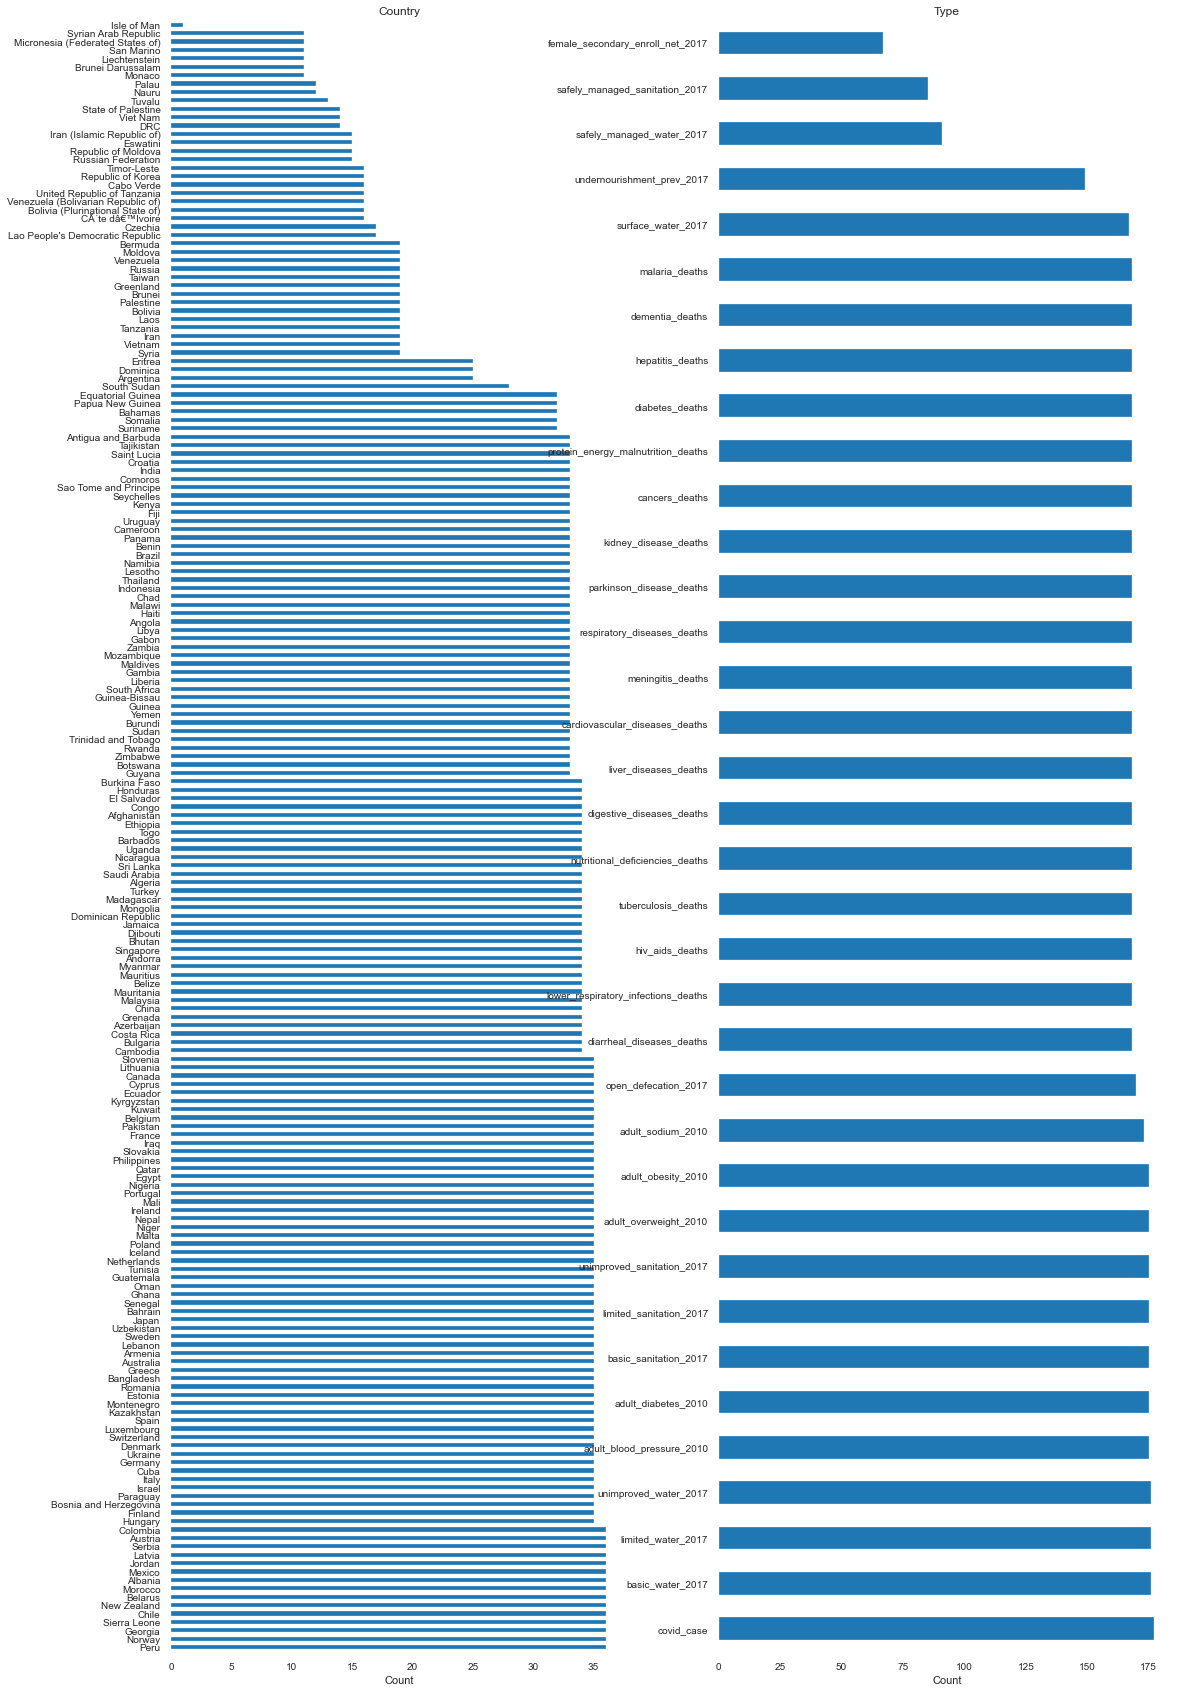

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 30)) #create 2 subplots
df.country.value_counts().plot(kind='barh', ax=ax[0]) #specify horizontal barplot
ax[0].set_title('Country') #title
ax[0].set_xlabel('Count') #xaxis label
df.type.value_counts().plot(kind='barh', ax=ax[1]) #second horizontal barplot
ax[1].set_title('Type') #second title
ax[1].set_xlabel('Count') #second xaxis label
#plt.subplots_adjust(wspace=0.1); #whitespace

With the above visualizations we can see which countries have more or less variables associated with them and which types are present or not most often.  

#### 2.6.3.5 Distribution of Type and Country<a id='2.6.3.5_Distribution_Of_Ticket_Price_By_State'></a>

The primary focus in this study is on the covid_case type and the ability to predict the total for this type.  Thus, it is good that we have values for this variable for each country.  We also have several other variables with full data that could be used as predictors.  We can also use variables without full data, but it is important to know which countries have all 36 types and which do not.  

### 2.6.4 Numerical Features<a id='2.6.4_Numerical_Features'></a>

We can view totals with [seaborn](https://seaborn.pydata.org/)'s [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function to create boxplots of the totals for each type.

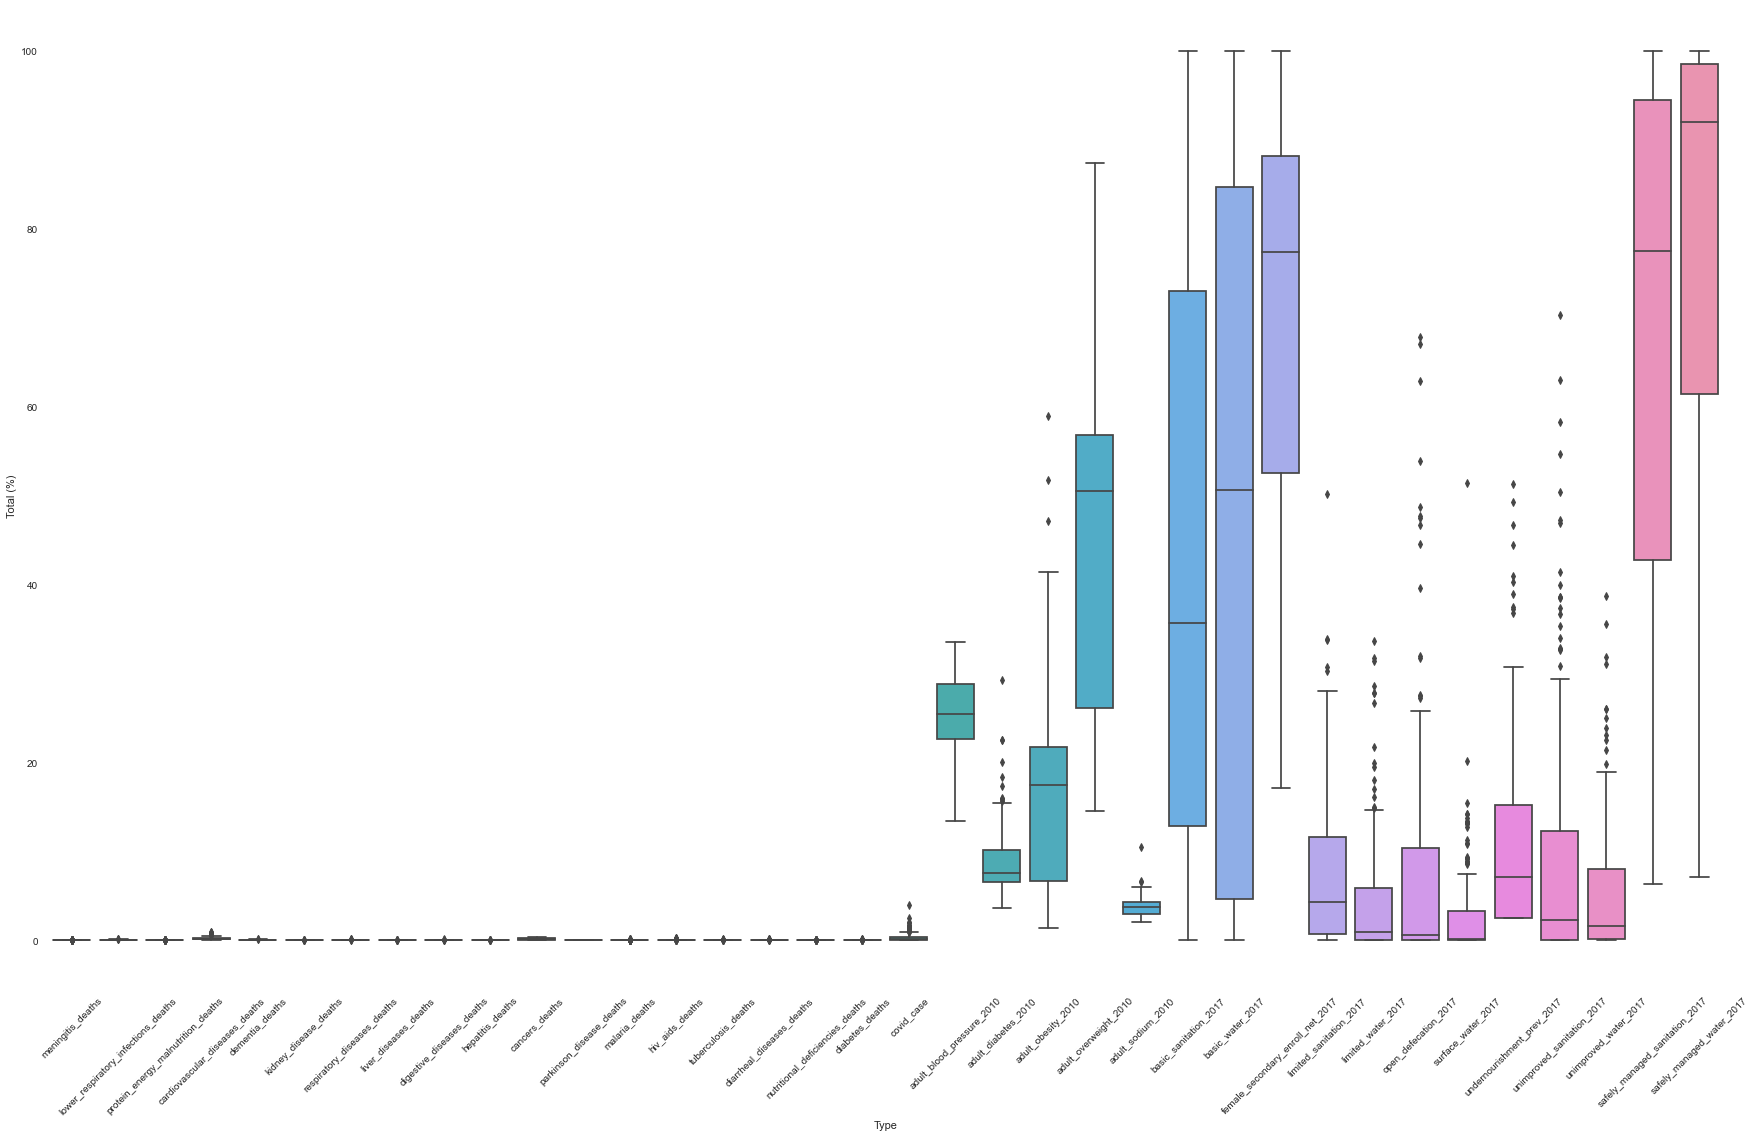

In [62]:
#Create a seaborn boxplot
plt.subplots(figsize=(30, 18)) #size of fig
sns.boxplot(x='type', y='total', data=df) #seaborn boxplot of type features and total(%)
plt.xticks(rotation='45') #orientation of xlabels
plt.ylabel('Total (%)') #yaxis label
plt.xlabel('Type'); #xaxis label

The above boxplots show our totals for each categorical feature type.  While there are some outliers, the occurances make sense.  For example, it would be expected that features like limited water or undernourishment would have a typical range, but also occur at higher percentages in some countries based on available resources.  There are some types that have more predominent total percentages, so they may have greater correlation with COVID, however, the incidence of COVID is also quite a low percentage so there the types with smaller percentages may have a significant linear relation.  This will be important to expolore during Exploratory Data Analysis (EDA).  

Currently, we have clean and informative data on which we are ready to begin EDA.

## 2.7 Review distributions<a id='2.7_Review_distributions'></a>

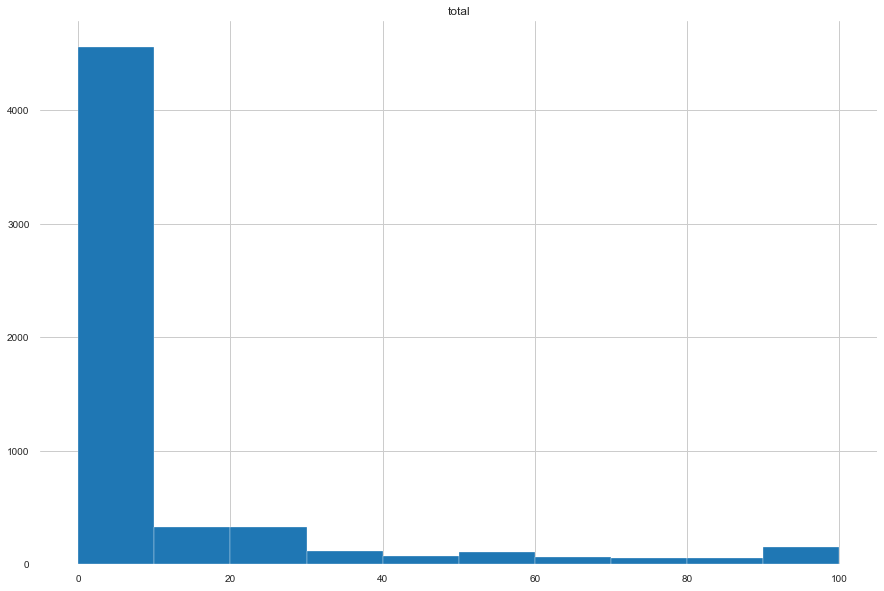

In [63]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

These distributions mirror what we saw above.  There majority of totals are under 40%, however, there are some that range from 40-100%.  These distributions are dependent on the prevelance of the type feature.  During modeling, we should be cautious if higher percentage and range types are not important since the domain knowledge is showing us these features are important.

## 2.8 Save data<a id='2.8_Save_data'></a>

In [90]:
df.shape

(5856, 3)

Save this to your data directory, separately. Note that you were provided with the data in `raw_data` and you should saving derived data in a separate location. This guards against overwriting our original data.

In [91]:
dataOutPath = 'H:\\2020\\Programming\\SampleWork\\6.Capstone2\\Data\\complete_cleaned_data.csv'
df.to_csv(dataOutPath, index = False)

## 2.9 Summary<a id='2.9_Summary'></a>

* Percentages were utilized to format all the data to the same type and to normalize the data for different population sizes in countries.
* All three datasets were merged into one dataframe (df).
* Appropriate values were renamed or removed.
* To predict covid_cases, any other of the 5856 rows of type.  
* This dataset is ready to move into exploratory data analysis to determine how various type features correlate.  

## 3.0 Revisiting the Data<a id = '3.0_Revisiting_the_Data'></a>

Upon completing initial data wrangling steps and reviewing the data, it was clear that name mis-matches were resulting in a loss of significant amounts of data.  Stepping back to the initial R-workup, these mismatches were corrected.  

It also seemed clear from the datasets that other information could prove valuable, such as mobility data and economic factors of the county.  Initially these were assumed to be inferable from death, nutrition, and nutrition determinants (i.e. lower death rates from meningitis would occur in economically advanced countries).  However, observations within the dataset showed that this was not as clear-cut as expected.  One particullarly confounding factor that arose during review of the data was that deaths from COVID were grouped by country, but country size (and therefore population per area) varied greatly.  This was addressed through the addition of mobility data (i.e. changes in how people are moving about to differnt types of locations such as work or retailers).  

Additional data can be viewed in a readable format in the AllData file/dataframe.

In [8]:
# the CSV data files from the work done in R are in the data directory
path = str(os.getcwd())
dfall = pd.read_csv(path + '\\AllData.csv', encoding = 'ansi')
dfall.sample(30)

,country,adult_anemia_2000,adult_anemia_2001,adult_anemia_2002,adult_anemia_2003,adult_anemia_2004,adult_anemia_2005,adult_anemia_2006,adult_anemia_2007,adult_anemia_2008,...,hepatitis_deaths,lower_respiratory_infections_deaths,digestive_diseases_deaths,nutritional_deficiencies_deaths,economic_rating,macroeconomic_rating,id,date,confirmed,cases_per_cap
35,Georgia,29.833333,29.333333,28.966667,28.633333,28.366667,28.066667,27.700000,27.266667,26.866667,...,36.063693,801.330040,1979.017346,12.886679,NaN,NaN,GEO,2020-03-30,103,35.832749
115,Uruguay,23.833333,23.433333,23.133333,22.866667,22.633333,22.433333,22.266667,22.100000,21.900000,...,9.377722,1458.688414,1442.344634,133.881491,NaN,NaN,URY,2020-03-20,110,44.194075
72,Nepal,52.966667,51.233333,49.533333,47.900000,46.333333,44.833333,43.433333,42.166667,41.000000,...,783.300991,9520.823812,9596.218278,786.040038,3.333333,3.0,NPL,2020-05-07,101,114.785084
47,Ireland,15.033333,14.733333,14.533333,14.433333,14.333333,14.300000,14.266667,14.233333,14.266667,...,7.191198,1318.548405,1119.256600,8.702835,NaN,NaN,IRL,2020-03-14,129,570.170774
1,Angola,53.033333,52.466667,51.966667,51.466667,51.033333,50.633333,50.233333,49.833333,49.433333,...,413.642497,14947.036196,8061.307177,4805.547327,NaN,NaN,AGO,2020-06-10,113,6.916165
71,Namibia,35.666667,35.133333,34.600000,34.000000,33.366667,32.566667,31.700000,30.700000,29.600000,...,9.750866,1141.160634,583.643796,137.471986,NaN,NaN,NAM,2020-06-25,102,241.790885
90,Romania,26.533333,26.333333,26.233333,26.166667,26.066667,25.966667,25.833333,25.600000,25.400000,...,43.501921,6229.255080,14116.482077,83.582353,NaN,NaN,ROU,2020-03-14,123,418.318859
13,Bosnia and Herzegovina,29.400000,28.966667,28.666667,28.466667,28.300000,28.166667,28.000000,27.800000,27.600000,...,6.642691,358.637508,1135.314023,6.177518,NaN,NaN,BIH,2020-03-22,126,559.129313
51,Japan,26.100000,26.133333,26.133333,26.033333,25.900000,25.733333,25.466667,25.166667,24.933333,...,469.886108,105075.477700,54866.330881,1211.110533,NaN,NaN,JPN,2020-02-22,105,49.931240
114,Ukraine,23.100000,22.933333,22.833333,22.733333,22.633333,22.466667,22.333333,22.166667,21.966667,...,164.754726,9680.759798,32563.291568,180.869072,NaN,NaN,UKR,2020-03-25,145,248.133023


AllData has an abundance of information and some observation types are duplicated by year (i.e. adult_anemia_yyyy).  We will downselect this data by using the most recently collected dataset which will be most representative of the current population size.  Note, this may not always mean the most recent year since some later years are populated with Nan values. 



In [9]:
dfall.columns


Index(['country', 'adult_anemia_2000', 'adult_anemia_2001',
       'adult_anemia_2002', 'adult_anemia_2003', 'adult_anemia_2004',
       'adult_anemia_2005', 'adult_anemia_2006', 'adult_anemia_2007',
       'adult_anemia_2008',
       ...
       'hepatitis_deaths', 'lower_respiratory_infections_deaths',
       'digestive_diseases_deaths', 'nutritional_deficiencies_deaths',
       'economic_rating', 'macroeconomic_rating', 'id', 'date', 'confirmed',
       'cases_per_cap'],
      dtype='object', length=404)

In [10]:
cols = ['country', 'adult_anemia_2016', 'adult_blood_pressure_2015', 'adult_diabetes_2014', 'adult_obesity_2016',
       'adult_overweight_2016', 'adult_sodium_2017', 'basic_sanitation_2017', 'basic_water_2017',
        #'community_health_workers_2016', 'early_childbearing_prev_2016', 'female_secondary_enroll_net_2018', <- all of these had very minimal data and wont be useful
        'fruit_veg_availability_2013', 'government_revenue_2020', 'limited_sanitation_2017',
        'limited_water_2017', 'nurses_and_midwives_2016', 'open_defecation_2017', 'physicians_2016',
        'safely_managed_sanitation_2017', 'safely_managed_water_2017', 'surface_water_2017',
        'undernourishment_prev_2017', 'unimproved_sanitation_2017', 'unimproved_water_2017', 
        'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline',
        'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline',
        'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline',
        'meningitis_deaths', 'kidney_disease_deaths', 'parkinson_disease_deaths', 'diabetes_deaths',
        'protein_energy_malnutrition_deaths', 'liver_diseases_deaths', 'malaria_deaths',
        'respiratory_diseases_deaths', 'tuberculosis_deaths', 'diarrheal_diseases_deaths',
        'dementia_deaths', 'cancers_deaths', 'hiv_aids_deaths', 'cardiovascular_diseases_deaths', 
        'hepatitis_deaths','lower_respiratory_infections_deaths', 'digestive_diseases_deaths',
        'nutritional_deficiencies_deaths', 'economic_rating', 'macroeconomic_rating', 'date', 'cases_per_cap']

df = dfall[cols]
df


,country,adult_anemia_2016,adult_blood_pressure_2015,adult_diabetes_2014,adult_obesity_2016,adult_overweight_2016,adult_sodium_2017,basic_sanitation_2017,basic_water_2017,fruit_veg_availability_2013,...,hiv_aids_deaths,cardiovascular_diseases_deaths,hepatitis_deaths,lower_respiratory_infections_deaths,digestive_diseases_deaths,nutritional_deficiencies_deaths,economic_rating,macroeconomic_rating,date,cases_per_cap
0,Afghanistan,40.866667,30.560,11.910,5.435,22.885,3.446667,43.42,67.06,172.67,...,271.336066,55101.310569,933.377917,21472.537569,5076.662867,1443.990128,3.000000,3.5,2020-03-27,97.477741
1,Angola,48.566667,29.590,8.175,8.060,27.185,3.163333,49.88,55.84,432.87,...,14460.271530,21103.476719,413.642497,14947.036196,8061.307177,4805.547327,NaN,NaN,2020-06-10,6.916165
2,Argentina,21.766667,22.615,9.670,28.155,62.750,3.776667,NaN,NaN,398.31,...,1726.551048,104685.644557,175.422649,31279.255082,14825.539424,1060.850637,NaN,NaN,2020-03-20,794.632721
3,Australia,12.633333,15.170,5.895,28.970,64.500,3.350000,24.35,99.97,523.27,...,74.468842,50031.911474,103.499020,4323.797195,5951.574556,118.094160,NaN,NaN,2020-03-10,98.668121
4,Austria,19.633333,20.985,4.315,20.090,54.295,3.940000,3.23,1.09,706.40,...,39.353963,31086.540646,5.561523,937.949711,3182.001430,8.633067,NaN,NaN,2020-03-08,285.171018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,USA,14.233333,12.925,7.305,36.210,67.960,5.113333,10.00,0.27,598.59,...,7261.846649,880034.676241,1024.098147,91591.853504,112503.329884,4864.562086,NaN,NaN,2020-03-04,1797.691306
117,Vietnam,28.400000,23.320,5.340,2.085,18.130,4.403333,83.52,94.72,590.51,...,11462.346501,196198.231496,660.131106,18009.098456,29027.106214,950.486484,NaN,NaN,2020-03-22,1.055700
118,Yemen,67.600000,30.550,11.365,16.985,48.670,3.610000,59.05,63.47,229.55,...,350.968076,51250.979258,366.488818,6446.951080,3391.734922,766.109997,1.833333,2.0,2020-05-15,6.430250
119,Zambia,35.266667,27.055,6.575,7.995,27.675,2.806667,26.37,59.96,98.59,...,22565.979293,11778.721635,307.278075,9034.482491,4873.669626,2694.352718,2.666667,3.0,2020-04-30,61.142250


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 50 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country                                             121 non-null    object 
 1   adult_anemia_2016                                   121 non-null    float64
 2   adult_blood_pressure_2015                           121 non-null    float64
 3   adult_diabetes_2014                                 121 non-null    float64
 4   adult_obesity_2016                                  121 non-null    float64
 5   adult_overweight_2016                               121 non-null    float64
 6   adult_sodium_2017                                   121 non-null    float64
 7   basic_sanitation_2017                               120 non-null    float64
 8   basic_water_2017                                    120 non-null    float64
 9  

In [12]:
# looking at other years of data
dfall.adult_anemia_2018, dfall.adult_anemia_2016 # 2016 has non-nans 
dfall.community_health_workers_2010 # all data for community_health_workers is Nan -- remove
dfall.early_childbearing_prev_2015  # this dataset is lacking in information for many years, not just the most recent
dfall.female_secondary_enroll_net_2013  # this dataset is also lacking info

0      33.94
1        NaN
2      91.19
3        NaN
4      86.30
       ...  
116    90.09
117      NaN
118    35.53
119      NaN
120    44.08
Name: female_secondary_enroll_net_2013, Length: 121, dtype: float64

In [13]:
# save the completed df for future work.
# NOTE: some columns are still lacking in data and if we find they are highly correlated, we may need to revisit our data sources or find new ones
dataOutPath = 'H:\\2020\\Programming\\SampleWork\\6.Capstone2\\Data\\alldata_cleaned_downselected.csv'
df.to_csv(dataOutPath, index = False)